In [1]:
#Inspired by https://www.kaggle.com/fahd09/eda-of-crime-in-chicago-2005-2016
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import plotly.plotly as py

In [42]:
shooting_data=pd.read_csv("Rochester_Shooting_Victims.csv")
homicide_data =pd.read_csv("RochesterNY_Homicides.csv")
all_crime_data=pd.read_csv("RPD__Part_I_Crime_2011_to_Present.csv")

In [43]:
homicide_data.describe()

,X,Y,OBJECTID,Id,OccurredMonth,OccurredYear,DateOfDeathMonth,DateOfDeathYear,DateDifference,Latitude,Longitude,Beat,VictimCount,ArresteeCount,Zipcode
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,476.000000,702.000000
mean,-77.616998,43.165226,351.500000,360.066952,6.603989,2007.650997,6.611111,2007.913105,95.776353,43.165218,-77.616995,244.547009,1.031339,1.260504,14612.779202
std,0.023496,0.017898,202.794231,209.782966,3.270477,5.366124,3.297609,5.082444,812.862129,0.017898,0.023496,26.842063,0.224436,0.587049,6.053586
min,-77.665985,43.108455,1.000000,1.000000,1.000000,1975.000000,1.000000,2000.000000,-2.000000,43.108446,-77.665982,201.000000,1.000000,1.000000,14604.000000
25%,-77.636102,43.150615,176.250000,176.250000,4.000000,2003.000000,4.000000,2003.000000,0.000000,43.150606,-77.636099,223.000000,1.000000,1.000000,14608.000000
50%,-77.622638,43.167369,351.500000,361.500000,7.000000,2007.000000,7.000000,2007.000000,0.000000,43.167361,-77.622636,243.000000,1.000000,1.000000,14611.000000
75%,-77.599625,43.178259,526.750000,537.750000,9.000000,2012.000000,9.000000,2012.000000,0.000000,43.178251,-77.599622,267.000000,1.000000,1.000000,14621.000000
max,-77.538347,43.258173,702.000000,733.000000,12.000000,2018.000000,12.000000,2018.000000,12075.000000,43.258164,-77.538344,297.000000,4.000000,4.000000,14627.000000


In [49]:
shooting_data.head(5)

,X,Y,ObjectID,ID,Case_Number,Address,Occurred_Date,Occurred_Month,Occurred_Year,Crime_Type,Multiple_Shooting,Gender,Race,Ethnicity,Victim_Age,Victim_Age_Band,Zipcode
0,-77.585467,43.162928,1,b495a5eb9b56d2052eeab6a5e52ecf75,16-295732,"18 FOURTH ST, ROCHESTER, NY, 14609",2016-11-19T01:00:00.000Z,11,2016,SHOOTING,NO,MALE,BLACK,NON HISPANIC,22,15-24,14609
1,-77.629118,43.143226,2,424f1e5dca93ada794bba3499d214abb,16-290863,"581 JEFFERSON AVE, ROCHESTER, NY, 14611",2016-11-13T01:00:00.000Z,11,2016,HOMICIDE,YES,MALE,BLACK,NON HISPANIC,32,25-44,14611
2,-77.629118,43.143226,3,fb552242be5e23f6b7c95b7ed7f4d98a,16-290863,"581 JEFFERSON AVE, ROCHESTER, NY, 14611",2016-11-13T01:00:00.000Z,11,2016,SHOOTING,YES,MALE,BLACK,NON HISPANIC,45,45-OLDER,14611
3,-77.596957,43.185086,4,9066f3877cebf83ad87f3a5fc6cb5e5c,16-288632,"85 KOSCIUSKO ST, ROCHESTER, NY, 14621",2016-11-09T12:00:00.000Z,11,2016,SHOOTING,NO,MALE,BLACK,NON HISPANIC,34,25-44,14621
4,-77.647313,43.139793,5,24e4944d3c42553f5c05ea272cc68477,16-282715,"398 ABERDEEN ST, ROCHESTER, NY, 14619",2016-11-02T22:00:00.000Z,10,2016,SHOOTING,NO,MALE,WHITE,HISPANIC,22,15-24,14619


In [47]:
homicide_data.pdOccurredDate=pd.to_datetime(homicide_data.OccurredDate)

In [48]:
homicide_data.pdOccurredDate.head(3)

0   2000-01-13 05:00:00
1   2000-01-22 05:00:00
2   2000-01-25 05:00:00
Name: OccurredDate, dtype: datetime64[ns]

In [52]:
shooting_data.pdOccurredDate=pd.to_datetime(shooting_data.Occurred_Date)

In [53]:
shooting_data.pdOccurredDate.head(3)

0   2016-11-19 01:00:00
1   2016-11-13 01:00:00
2   2016-11-13 01:00:00
Name: Occurred_Date, dtype: datetime64[ns]

In [50]:
all_crime_data.pdOccurredFrom_time=pd.to_datetime(all_crime_data.OccurredFrom_Timestamp)

In [7]:
all_crime_data.pdOccurredFrom_time.head(3)

0   2014-06-16 00:30:00
1   2017-06-17 12:00:00
2   2018-02-14 08:00:00
Name: OccurredFrom_Timestamp, dtype: datetime64[ns]

In [8]:
all_crime_data.OBJECTID.head(3)

0    1
1    2
2    3
Name: OBJECTID, dtype: int64

In [9]:
all_crime_data.shape

(78268, 40)

In [58]:
all_crime_data.index=pd.DatetimeIndex(all_crime_data.pdOccurredFrom_time)

In [60]:
shooting_data.index=pd.DatetimeIndex(shooting_data.pdOccurredDate)

In [61]:
homicide_data.index=pd.DatetimeIndex(homicide_data.pdOccurredDate)

Text(0,0.5,u'Number of crimes')

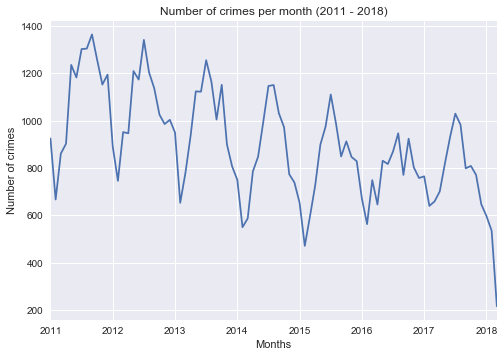

In [56]:
all_crime_data.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2011 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')

Text(0,0.5,u'Number of homicide')

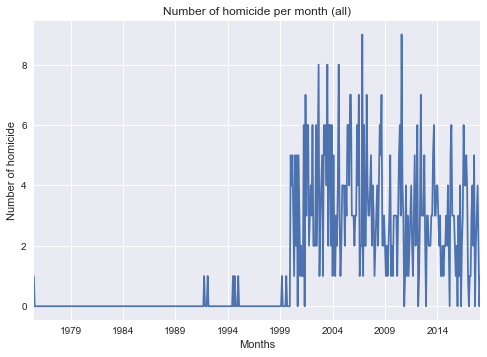

In [93]:
homicide_data.resample('M').size().plot(legend=False)
plt.title('Number of homicide per month (all)')
plt.xlabel('Months')
plt.ylabel('Number of homicide')

In [ ]:
# It appears the data before 2000 may not be complete. Filter the data to only include

In [85]:

homicide_data_2000onwards=homicide_data[homicide_data['OccurredYear']>=2000]

Text(0,0.5,u'Number of homicide')

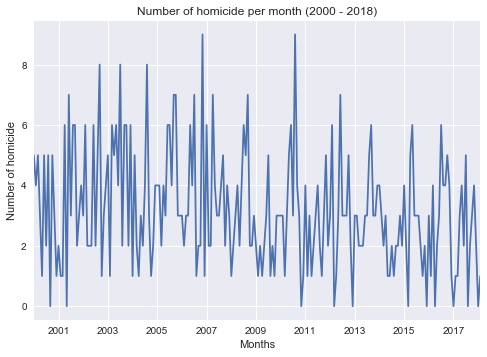

In [87]:
homicide_data_2000onwards.resample('M').size().plot(legend=False)
plt.title('Number of homicide per month (2000 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of homicide')

Text(0,0.5,u'Number of shootings')

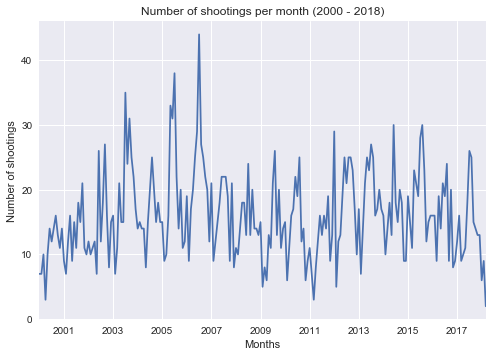

In [89]:
shooting_data.resample('M').size().plot(legend=False)
plt.title('Number of shootings per month (2000 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of shootings')

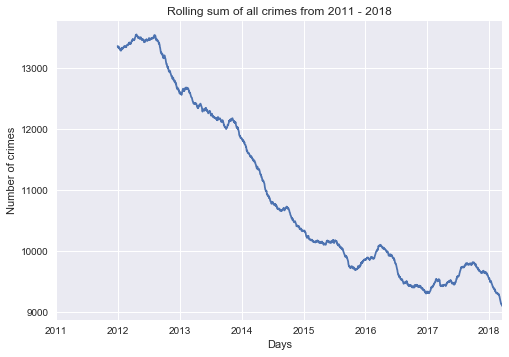

In [57]:
#The idea is, for each day, we calculate the sum of crimes of the past year. 
#If this rolling sum is decreasing, then we know for sure that crime rates have been decreasing during that year.
#On the other hand, if the rolling sum stays the same during a given year, then we can conclude that crime rates stayed the same.plt.show()
all_crime_data.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2011 - 2018')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

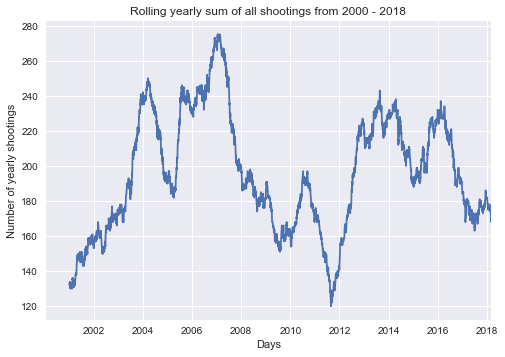

In [91]:
shooting_data.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling yearly sum of all shootings from 2000 - 2018')
plt.ylabel('Number of yearly shootings')
plt.xlabel('Days')
plt.show()

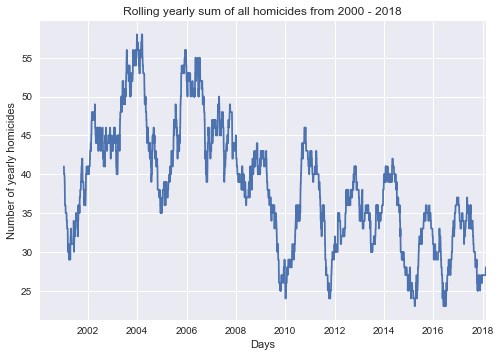

In [92]:
homicide_data_2000onwards.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling yearly sum of all homicides from 2000 - 2018')
plt.ylabel('Number of yearly homicides')
plt.xlabel('Days')
plt.show()

In [13]:
crimes_count_date = all_crime_data.pivot_table('OBJECTID', aggfunc=np.size, columns='Statute_Text', index=all_crime_data.index.date, fill_value=0)

In [14]:
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)

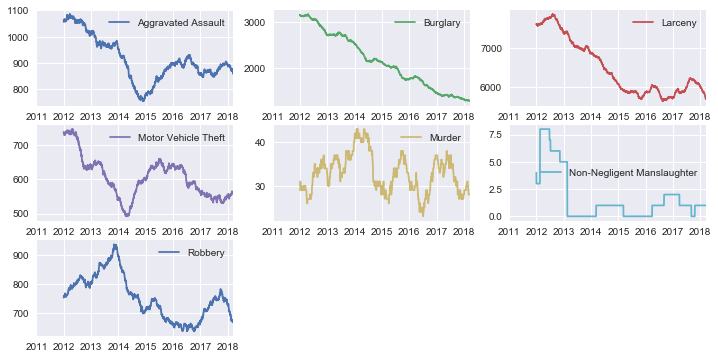

In [15]:
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 6), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

#looks like  Aggravated assault and Motor Vehicle theft dropped around 2013-2014 but bounced back a bit since then;
#Robbery on the other hind peaked around 2013-2014
#Burglary and Larceny droped throughout the years. Murder rate has been quite consistent throught the years.

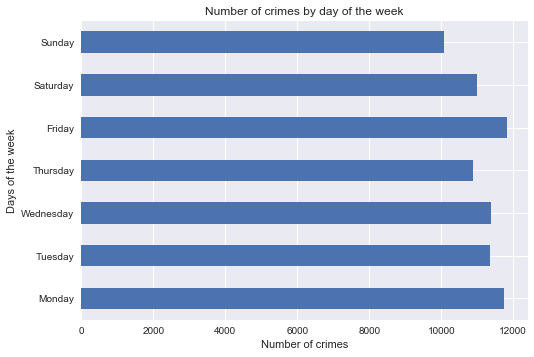

In [16]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
all_crime_data.groupby([all_crime_data.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

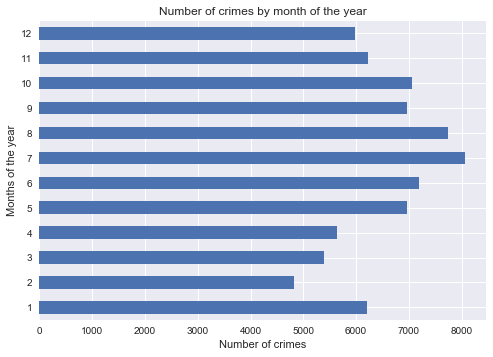

In [17]:
all_crime_data.groupby([all_crime_data.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

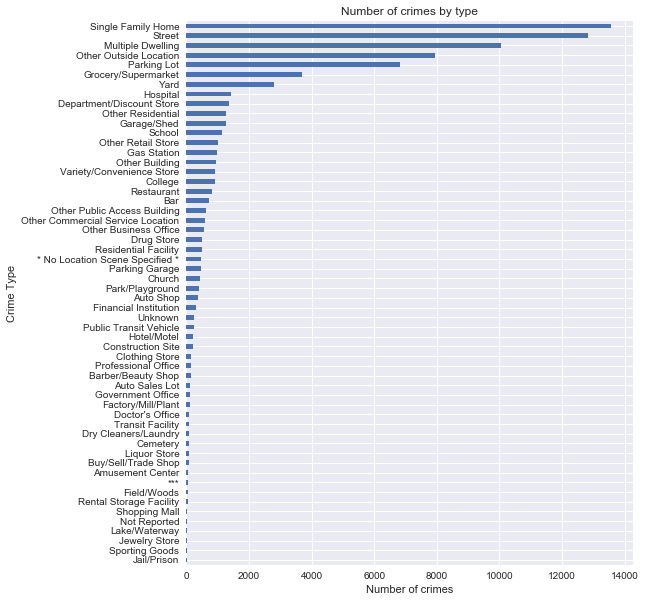

In [18]:
plt.figure(figsize=(8,10))
all_crime_data.groupby([all_crime_data['Location_Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

In [19]:
#Not all crimes are the same. Some crimes types are more likely to occur than other types depending on the place and time. 

In [20]:
#After seeing the base rates of each crime location and type, 
#we will now assume that all crime types (and locations) have the same frequency or, 
#in other words, they are all equal overall. 
#We are interested in detecting how a specific crime type is different across all days of the week or hours of the day.

In [21]:
#Is theft or burglary is more likely to occur at a weekday compared to a weekend? 
#Are they more likely to happen in the morning vs evening or late night ? 
#Are they more likely to occur in a street vs a bar?

In [22]:
hour_by_location = all_crime_data.pivot_table(values='OBJECTID', index='Location_Type', columns=all_crime_data.index.hour, aggfunc=np.size).fillna(0)

In [23]:
hour_by_location = all_crime_data.pivot_table(values='OBJECTID', index='Location_Type', columns=all_crime_data.index.hour, aggfunc=np.size).fillna(0)
hour_by_type     = all_crime_data.pivot_table(values='OBJECTID', index='Statute_Text', columns=all_crime_data.index.hour, aggfunc=np.size).fillna(0)

In [24]:
dayofweek_by_location = all_crime_data.pivot_table(values='OBJECTID', index='Location_Type', columns=all_crime_data.index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_type = all_crime_data.pivot_table(values='OBJECTID', index='Statute_Text', columns=all_crime_data.index.dayofweek, aggfunc=np.size).fillna(0)
location_by_type  = all_crime_data.pivot_table(values='OBJECTID', index='Location_Type', columns='Statute_Text', aggfunc=np.size).fillna(0)

In [25]:
from sklearn.cluster import AgglomerativeClustering as AC

In [26]:
def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

In [27]:
def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()

In [28]:
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

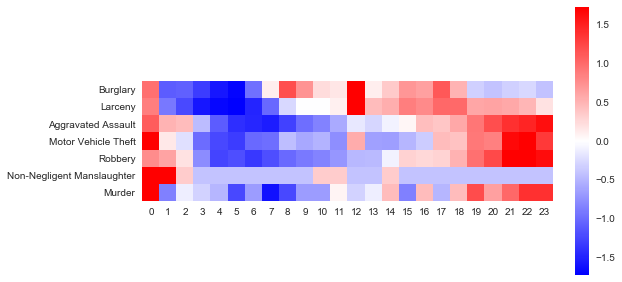

In [29]:
scale_and_plot(hour_by_type)

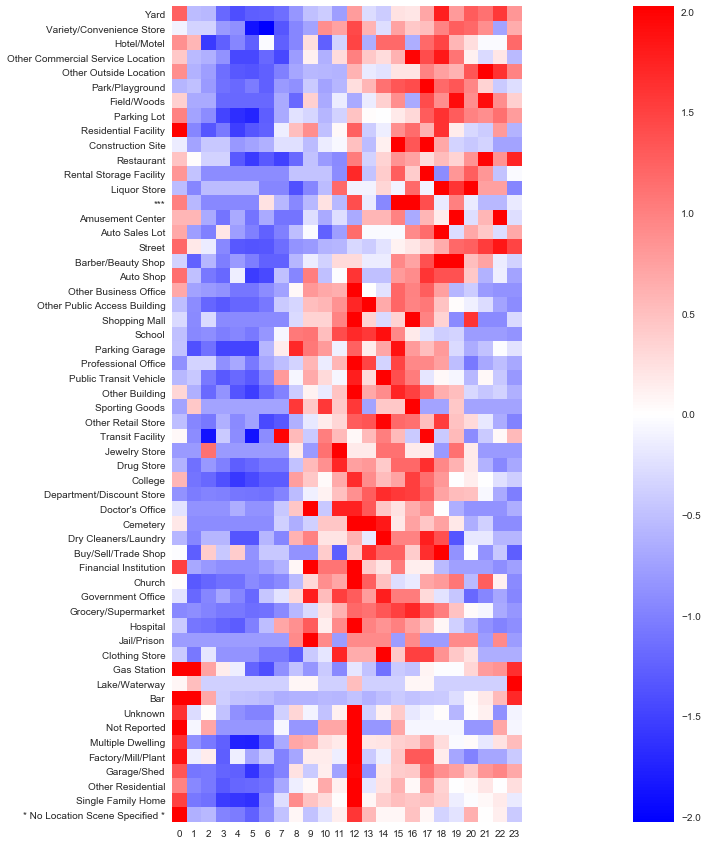

In [30]:
plt.figure(figsize=(40,15))
scale_and_plot(hour_by_location)

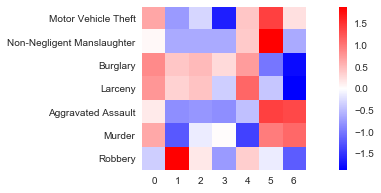

In [31]:
plt.figure(figsize=(12,3))
scale_and_plot(dayofweek_by_type)

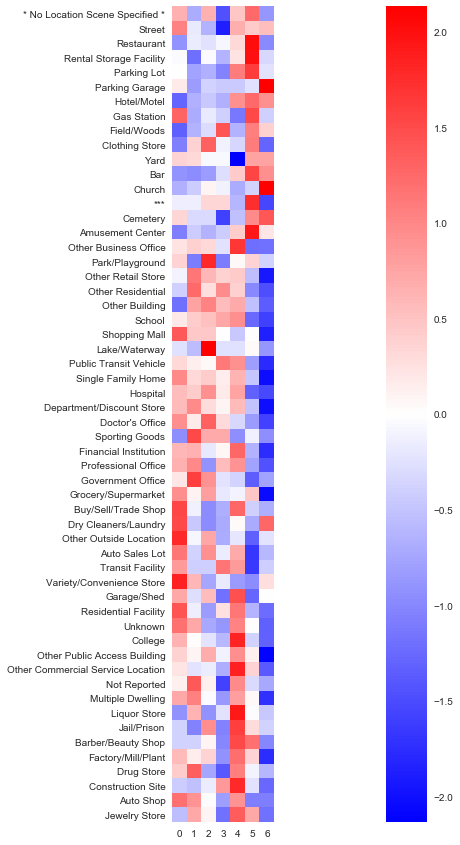

In [32]:
plt.figure(figsize=(40,15))
scale_and_plot(dayofweek_by_location)

In [33]:
#Where a certain crime type is most likely to happen?

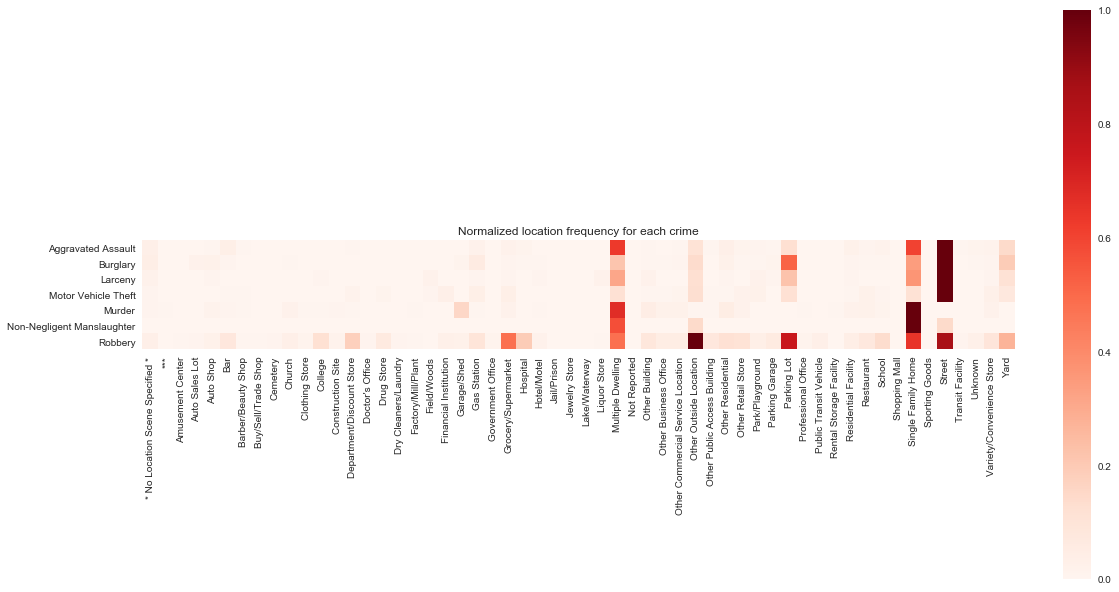

In [34]:
df = normalize(location_by_type)
ix = AC(3).fit(df.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()